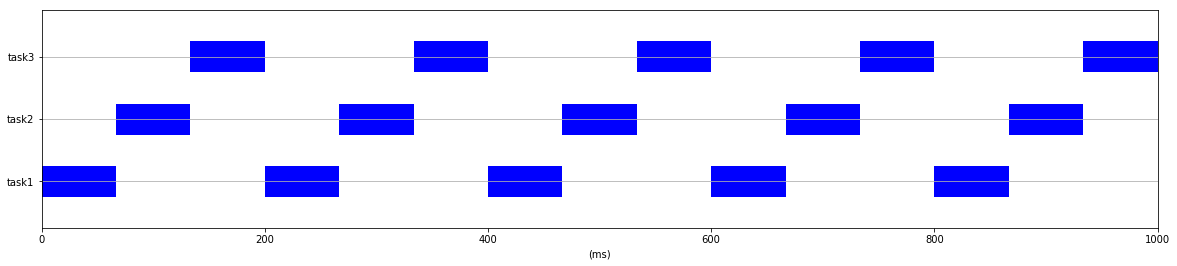

In [22]:
% matplotlib inline

import matplotlib.pyplot as plt

max_time = 1000
latency = 200

tasks = 3
task_nice = [0, 0, 0]
task_cpuratio = [1, 1, 1]
task_vruntime = [0, 0, 0]

total_weight = 0
task_weight = []
for i in range(tasks):
    task_weight.append(1.25 ** (-task_nice[i]))
    total_weight += task_weight[i]

task_slice = []
for i in range(tasks):
    task_slice.append(latency * task_weight[i] / total_weight)
    
time = 0
task_selected = []
while time < max_time:
    cur_task = task_vruntime.index(min(task_vruntime))
    task_selected.append(cur_task)
    task_vruntime[cur_task] += task_slice[cur_task] * task_cpuratio[cur_task]
    time += task_slice[cur_task]
    
fig, ax = plt.subplots(figsize=(max_time/50,4))
ax.grid(axis='y')

i = 0;
for ctask in task_selected:
    ax.broken_barh([(i, task_slice[ctask])], (ctask*10+5, 5), facecolors='blue')
    i = i + task_slice[ctask]

ax.set_ylim(0, 35)
ax.set_xlim(0, 1000)
ax.set_xlabel('(ms)')
ax.set_yticks([7.5, 17.5, 27.5])
ax.set_yticklabels(['task1', 'task2', 'task3'])
plt.show()